<a href="https://colab.research.google.com/github/Abhi-nav0506/Coronary-Heart-Disease-Prediction/blob/main/Cardio_Vascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from plotnine import ggplot
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cardio_risk_df = pd.read_csv('/content/drive/MyDrive/Copy of data_cardiovascular_risk.csv')

In [4]:
cardio_risk_df

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


In [5]:
cardio_risk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [56]:
null_value_features = cardio_risk_df.isna().sum().reset_index()
null_value_features = null_value_features[null_value_features[0] != 0].reset_index().drop('level_0',axis=1)
null_value_features

,index,0
0,education,87
1,cigsPerDay,22
2,BPMeds,44
3,totChol,38
4,BMI,14
5,heartRate,1
6,glucose,304


In [7]:
cardio_risk_df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [14]:
cardio_risk_df = cardio_risk_df.drop('id',axis=1)

In [16]:
cardio_risk_df

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


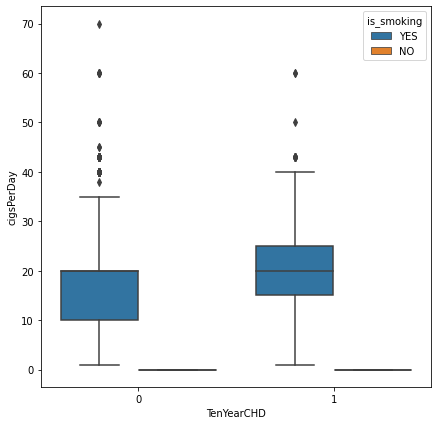

In [75]:
plt.figure(figsize=(7, 7))
sns.boxplot(x= cardio_risk_df['TenYearCHD'], y=cardio_risk_df['cigsPerDay'],hue=cardio_risk_df['is_smoking'])

In [78]:
cardio_risk_df.groupby(['TenYearCHD','is_smoking']).agg({'cigsPerDay':'mean'})

cigsPerDay
TenYearCHD is_smoking            
0          NO            0.000000
           YES          17.946082
1          NO            0.000000
           YES          20.375912

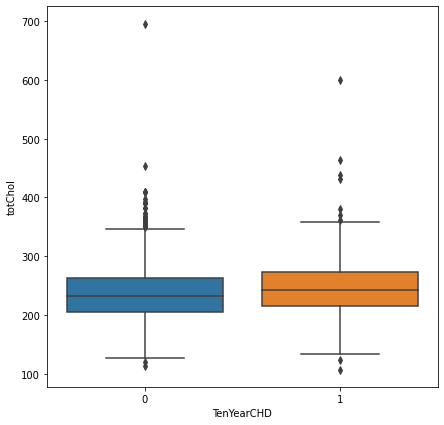

In [90]:
plt.figure(figsize=(7, 7))
sns.boxplot(x= cardio_risk_df['TenYearCHD'], y=cardio_risk_df['totChol'])

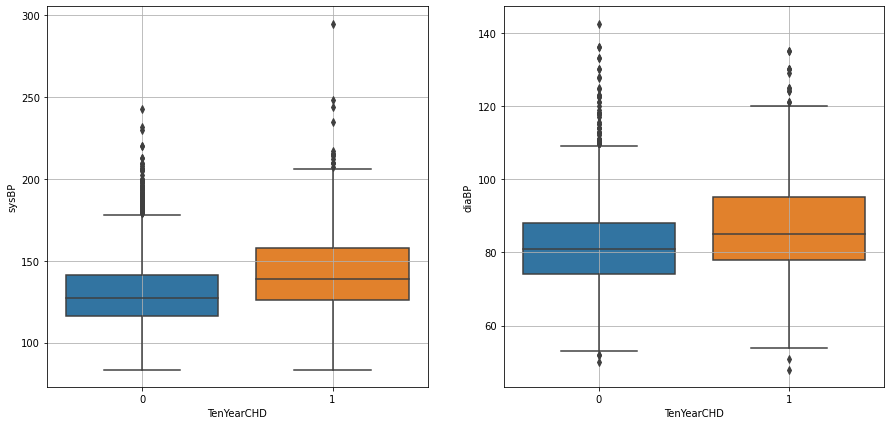

In [64]:
fig, ax = plt.subplots(1, 2, figsize=(15,7))

sns.boxplot(x= cardio_risk_df['TenYearCHD'], y=cardio_risk_df['sysBP'],ax=ax[0])
ax[0].grid()

sns.boxplot(x= cardio_risk_df['TenYearCHD'], y=cardio_risk_df['diaBP'],ax=ax[1])
ax[1].grid()

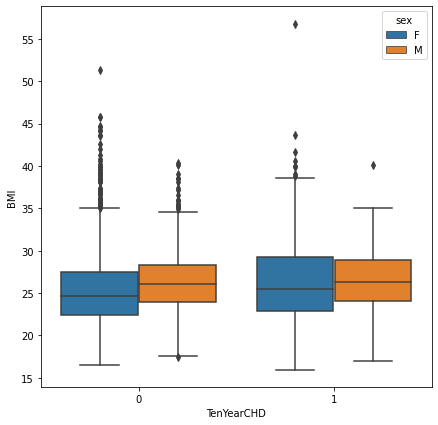

In [70]:
plt.figure(figsize=(7, 7))
sns.boxplot(x= cardio_risk_df['TenYearCHD'], y=cardio_risk_df['BMI'],hue=cardio_risk_df['sex'])

In [69]:
bmi_df = cardio_risk_df.groupby(['TenYearCHD','sex']).agg({'BMI':'median'}).reset_index().rename(columns={'BMI':'BMI_median'})
bmi_df

,TenYearCHD,sex,BMI_median
0,0,F,24.580
1,0,M,26.085
2,1,F,25.520
3,1,M,26.340


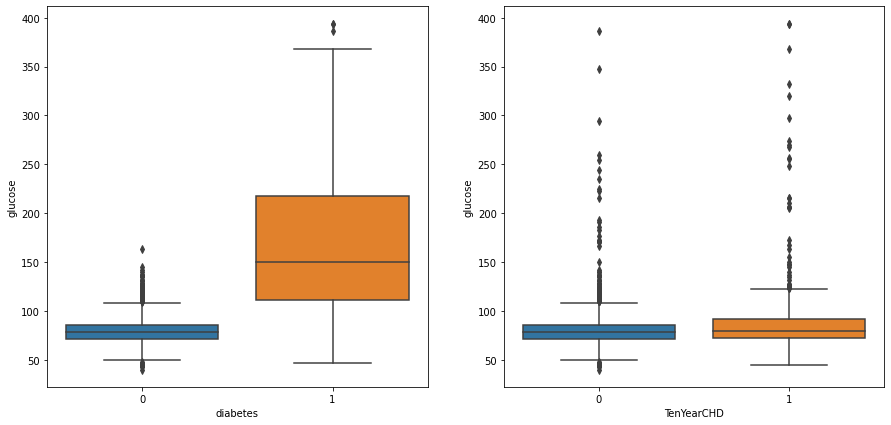

In [86]:
fig, ax = plt.subplots(1, 2, figsize=(15,7))
sns.boxplot(x= cardio_risk_df['diabetes'], y=cardio_risk_df['glucose'],ax=ax[0])

sns.boxplot(x= cardio_risk_df['TenYearCHD'], y=cardio_risk_df['glucose'],ax=ax[1])

In [87]:
# checking glucose NaN values by diabetes (0,1)
cardio_risk_df[cardio_risk_df['glucose'].isna()].diabetes.value_counts()

0    301
1      3
Name: diabetes, dtype: int64

* #### Maximum of the 'NaN' values in glucose feature belongs 'diabetes'==0, ie non diabetic people, so missing values of glucose will be filled by median across diabetic and non diabetic. 

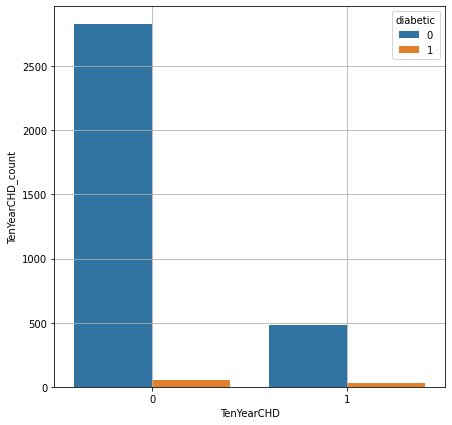

In [101]:
plt.figure(figsize=(7,7))
chd_diabetic_df = cardio_risk_df.groupby(['TenYearCHD','diabetes']).agg({'is_smoking':'count'}).reset_index().rename(columns={'is_smoking':'TenYearCHD_count','diabetes':'diabetic'})

sns.barplot(x='TenYearCHD',y='TenYearCHD_count',hue='diabetic',data=chd_diabetic_df)
plt.grid()

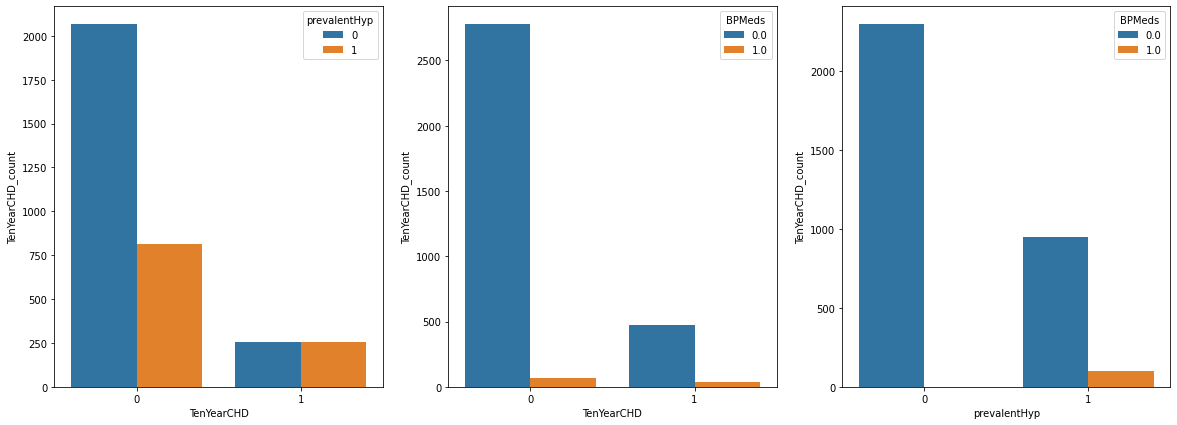

In [96]:
fig, ax = plt.subplots(1, 3, figsize=(20,7))

chd_prevalentHyp_df = cardio_risk_df.groupby(['TenYearCHD','prevalentHyp']).agg({'is_smoking':'count'}).reset_index().rename(columns={'is_smoking':'TenYearCHD_count'})

chd_bp_meds_df = cardio_risk_df.groupby(['TenYearCHD','BPMeds']).agg({'is_smoking':'count'}).reset_index().rename(columns={'is_smoking':'TenYearCHD_count'})

hyp_bp_meds_df = cardio_risk_df.groupby(['prevalentHyp','BPMeds']).agg({'is_smoking':'count'}).reset_index().rename(columns={'is_smoking':'TenYearCHD_count'})

sns.barplot(x='TenYearCHD',y='TenYearCHD_count',hue='prevalentHyp',data=chd_prevalentHyp_df,ax=ax[0])

sns.barplot(x='TenYearCHD',y='TenYearCHD_count',hue='BPMeds',data=chd_bp_meds_df,ax=ax[1])

sns.barplot(x='prevalentHyp',y='TenYearCHD_count',hue='BPMeds',data=hyp_bp_meds_df,ax=ax[2])

In [97]:
# checking BPMeds NaN values 
cardio_risk_df[cardio_risk_df['BPMeds'].isna()].TenYearCHD.value_counts()

0    37
1     7
Name: TenYearCHD, dtype: int64

* #### 'BPMeds' is a binary feature indicating whether the concerned person has been taking any Blood Pressure related medication. 

* #### Majority of the persons, who have 'TenYearCHD' risk (1), have not been taking 'BPMeds' (middle barplot above).

* #### 'BPMeds' feature has 44 'NaN' values, out of which 37 DO NOT have 'TenYearCHD' risk (0) and 7 have (1). For both, from the middle barplot we see that majority of them have not been taking any medication prior, so the missing values will be filled by the mode here, which is 0. 

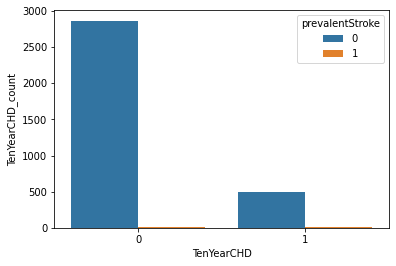

In [60]:
chd_prevalentStroke_df = cardio_risk_df.groupby(['TenYearCHD','prevalentStroke']).agg({'is_smoking':'count'}).reset_index().rename(columns={'is_smoking':'TenYearCHD_count'})

sns.barplot(x='TenYearCHD',y='TenYearCHD_count',hue='prevalentStroke',data=chd_prevalentStroke_df)

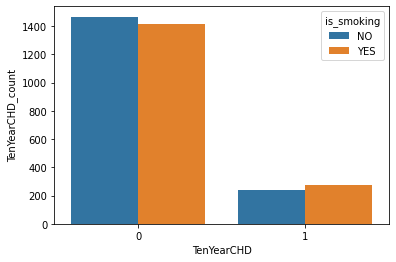

In [61]:
chd_is_smoking_df = cardio_risk_df.groupby(['TenYearCHD','is_smoking']).agg({'prevalentStroke':'count'}).reset_index().rename(columns={'prevalentStroke':'TenYearCHD_count'})

sns.barplot(x='TenYearCHD',y='TenYearCHD_count',hue='is_smoking',data=chd_is_smoking_df)